## Imports

In [1]:
import pandas as pd
import numpy as np
import nltk
import re
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import sklearn.metrics as mt
import nltk
from sklearn.linear_model import LogisticRegression
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.tokenize import sent_tokenize
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Loading Data

In [2]:
#loading data into a pandas dataframe
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')

### Data Analysis

In [3]:
#Looking into data
df.head(10)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits
7,7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits
8,8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses
9,9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,General,Dresses,Dresses


In [4]:
#number of rows and columns in the data
df.shape

(23486, 11)

<b>Observation:</b> There are 23,486 rows/records and 11 data fields present in the E-commerce dataset. 

In [5]:
#getting information about data i.e. column names, data type and count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [6]:
#count of data types present in the data
df.dtypes.value_counts()

int64     6
object    5
dtype: int64

<b>Observation:</b> There are 6 integer and 5 object datatypes in the data

In [7]:
#Statistics of data
df.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


<b>Observations:</b>  
1. Unnamed column contains the serial number/index of the reviews.  
2. Clothing ID contains the IDs of different clothes, multiple cloths have same cloth IDs (encoded column)  
3. Minimum Age of the reviewer is 18, maximum age is 99, most records have the ages between 40 and 50.  
4. Recommended IND is a boolean type contains 0(Not Recommended) and 1(Recommended).  
5. Positive Feedback Count contains count of the positive feedback, minimum positive feedback count is 0 

In [8]:
#statistics of object type columns
df.describe(include='O')

,Title,Review Text,Division Name,Department Name,Class Name
count,19676,22641,23472,23472,23472
unique,13993,22634,3,6,20
top,Love it!,Perfect fit and i've gotten so many compliment...,General,Tops,Dresses
freq,136,3,13850,10468,6319


<b>Observations:</b>  
1. There are 13993 unique titles in the dataset.  
2.  Review Text column contains the reviews written by the clients  
3. Division Name, Department Name and Class Name are the categorical variables

In [9]:
#checking for the null values in the dataset
df.isna().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

Text(0, 0.5, 'Count of Missing Values')

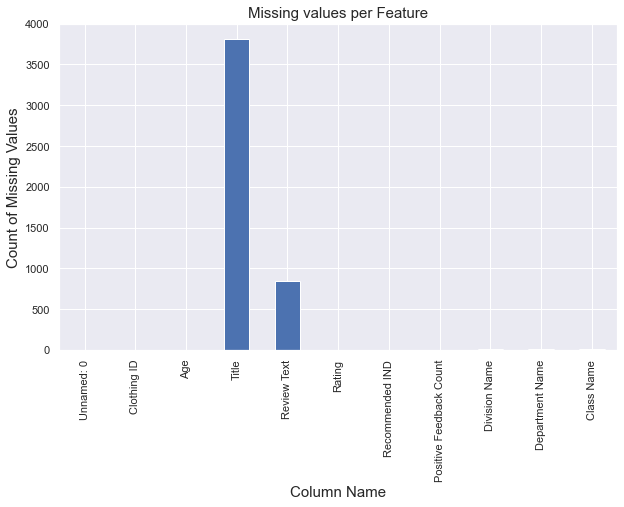

In [10]:
sns.set(rc={'figure.figsize':(10,6)})
pd.isnull(df).sum().plot(kind='bar')
plt.title('Missing values per Feature',size = 15)
plt.xlabel('Column Name',size = 15)
plt.ylabel('Count of Missing Values', size = 15)

<b>Observation:</b>  
1. Title column contains 3810 missing records  
2. Review Text contains 845 missing records  
3. Division Name, Department Name and Class Name contain 14 missing values each

### Text Preprocessing

In [11]:
#dropping NaN values and removing useless columns, as well as clean the text
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
import re
for i in range(len(df)):
    #print(i)
    df['Review Text'][i] = df['Review Text'][i].replace("'s", " is").replace("'ll", " will").replace("'ve", " have").replace("'m", " am").replace("\'", "'")
    
df['Review Text'][1]
df = df.drop('Unnamed: 0', 1)

<ipython-input-11-22ae0ea28f2a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review Text'][i] = df['Review Text'][i].replace("'s", " is").replace("'ll", " will").replace("'ve", " have").replace("'m", " am").replace("\'", "'")


### Tokenization

In [12]:
#defining a function to clean and tokenize the review text
#transfering the text to lowercase
def clean_and_tokenize(review):
    text = review.lower()
   
    tokenizer = nltk.tokenize.TreebankWordTokenizer()
    tokens = tokenizer.tokenize(text)
    
    stemmer = nltk.stem.WordNetLemmatizer()
    text = " ".join(stemmer.lemmatize(token) for token in tokens)
    text = re.sub("[^a-z']"," ", text)
    return text
df["Clean_Review"] = df["Review Text"].apply(clean_and_tokenize)

In [13]:
#Breaking down reviews into stream of tokens
tokenized_words = df["Clean_Review"].apply(word_tokenize)

In [14]:
#saving tokenized reviews in Tokenized_review column
df['Tokenized_Reviews']=df["Clean_Review"].apply(word_tokenize)

### Frequency of occurance of words/tokens

In [15]:
#Checking frequency of each word/token in a review
df['Tokenized_Reviews'].apply(FreqDist)

0        {'i': 5, 'had': 2, 'such': 1, 'high': 1, 'hope...
1        {'i': 3, 'love': 3, 'this': 1, 'jumpsuit': 1, ...
2        {'this': 2, 'shirt': 2, 'is': 3, 'very': 1, 'f...
3        {'i': 4, 'love': 2, 'tracy': 1, 'reese': 1, 'd...
4        {'i': 8, 'aded': 1, 'this': 1, 'in': 2, 'my': ...
                               ...                        
19657    {'i': 1, 'wa': 1, 'very': 3, 'happy': 1, 'to':...
19658    {'it': 1, 'reminds': 1, 'me': 2, 'of': 1, 'mat...
19659    {'this': 2, 'fit': 1, 'well': 1, 'but': 1, 'th...
19660    {'i': 6, 'bought': 1, 'this': 3, 'dress': 2, '...
19661    {'this': 1, 'dress': 1, 'in': 1, 'a': 1, 'love...
Name: Tokenized_Reviews, Length: 19662, dtype: object

### Removing Stop Words


In [16]:
#creating a list of stop words
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
print(stop_words)

{"didn't", 'because', 'about', 'can', "you've", "shouldn't", "won't", 'your', 'but', "that'll", 'nor', 'for', 'of', 'other', 'd', "you're", 'wouldn', 'yourselves', 'so', 'me', 'against', "weren't", 'needn', 'between', 'who', "you'd", 'being', 'again', 'mustn', 'does', 'only', 'been', 'whom', 'here', 're', 'her', "don't", 'or', 'doing', 'is', 'as', 's', 'hadn', 'which', 'on', 'now', 'do', 'yourself', 'himself', 'that', 'at', 'ain', 'these', 'am', "isn't", 'our', 'each', 'i', 'same', 'they', 'most', 'from', 'when', 't', 'some', "needn't", 'having', 'will', 'more', 'aren', 'didn', 'how', 'she', "hadn't", 'doesn', 'then', 'through', 'hasn', 'why', 'very', 'haven', 'had', 'he', 'its', 'his', 'where', "it's", "she's", 'to', 'out', 've', 'y', 'there', 'it', 'few', 'both', 'into', 'you', 'and', 'yours', 'too', 'ourselves', 'their', 'under', 'than', 'be', 'over', 'wasn', 'has', 'if', "aren't", 'was', 'him', 'an', 'my', 'should', 'them', "couldn't", "mustn't", "wasn't", 'by', 'own', 'o', 'the', 

In [17]:
#Removing Stop Words
df['Filtered_Reviews']=df['Tokenized_Reviews'].apply(lambda x: [item for item in x if item not in stop_words])

### Lemmatization

In [18]:
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

In [19]:
#lemmatization to get the root words
def lemmatize(s):
    s = [wnl.lemmatize(word) for word in s]
    return s

df = df.assign(col_lemma = df.Filtered_Reviews.apply(lambda x: lemmatize(x)))

In [20]:
tokenized_sent = np.array(df['col_lemma'])

In [21]:
#frequency of lemmatized text
df['col_lemma'].apply(FreqDist)

0        {'high': 1, 'hope': 1, 'dress': 1, 'really': 1...
1        {'love': 3, 'jumpsuit': 1, 'fun': 1, 'flirty':...
2        {'shirt': 2, 'flattering': 1, 'due': 1, 'adjus...
3        {'love': 2, 'tracy': 1, 'reese': 1, 'dress': 4...
4        {'aded': 1, 'basket': 1, 'hte': 4, 'last': 1, ...
                               ...                        
19657    {'wa': 1, 'happy': 1, 'snag': 1, 'dress': 1, '...
19658    {'reminds': 1, 'maternity': 1, 'clothes': 1, '...
19659    {'fit': 1, 'well': 1, 'top': 1, 'wa': 2, 'see'...
19660    {'bought': 1, 'dress': 2, 'wedding': 1, 'summe...
19661    {'dress': 1, 'lovely': 1, 'platinum': 1, 'femi...
Name: col_lemma, Length: 19662, dtype: object

### Sentiment Analysis

In [22]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [23]:
nltk.download('opinion_lexicon')

[nltk_data] Error loading opinion_lexicon: <urlopen error [Errno
[nltk_data]     11001] getaddrinfo failed>


False

In [24]:
from nltk.corpus import opinion_lexicon

In [25]:
def Sentiment_Analysis(sentence):
    """
    This function simply counts the number of positive, negative and neutral words
    in the sentence and classifies it depending on which polarity is more represented.
    Words that do not appear in the lexicon are considered as neutral.
    """
    
    pos_words = 0
    neg_words = 0

    #x = list(range(len(sentence)))  # x axis for the plot
    y = []

    for word in sentence:
        if word in opinion_lexicon.positive():
            pos_words += 1
            y.append(1)  # positive
        elif word in opinion_lexicon.negative():
            neg_words += 1
            y.append(-1)  # negative
        else:
            y.append(0)  # neutral

    if pos_words > neg_words:
        return "Positive"
    elif pos_words < neg_words:
        return "Negative"
    elif pos_words == neg_words:
        return "Neutral"

In [26]:
df['Sentiment']=df['col_lemma'].apply(lambda x: Sentiment_Analysis(x))

KeyboardInterrupt: 

In [40]:
temp = df[df['Sentiment']=='Positive']

In [41]:
temp['Review Text']

Series([], Name: Review Text, dtype: object)

In [46]:
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Clean_Review,Tokenized_Reviews,Filtered_Reviews,col_lemma,Sentiment
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,i had such high hope for this dress and really...,"[i, had, such, high, hope, for, this, dress, a...","[high, hope, dress, really, wanted, work, init...","[high, hope, dress, really, wanted, work, init...",None
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it is fun, f...",5,1,0,General Petite,Bottoms,Pants,i love love love this jumpsuit it is fun ...,"[i, love, love, love, this, jumpsuit, it, is, ...","[love, love, love, jumpsuit, fun, flirty, fabu...","[love, love, love, jumpsuit, fun, flirty, fabu...",None
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,this shirt is very flattering to all due to th...,"[this, shirt, is, very, flattering, to, all, d...","[shirt, flattering, due, adjustable, front, ti...","[shirt, flattering, due, adjustable, front, ti...",None
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,i love tracy reese dress but this one is not...,"[i, love, tracy, reese, dress, but, this, one,...","[love, tracy, reese, dress, one, petite, foot,...","[love, tracy, reese, dress, one, petite, foot,...",None
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,i aded this in my basket at hte last mintue to...,"[i, aded, this, in, my, basket, at, hte, last,...","[aded, basket, hte, last, mintue, see, would, ...","[aded, basket, hte, last, mintue, see, would, ...",None


In [29]:
df.to_csv('new_data.csv',index = False)

In [30]:
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Clean_Review,Tokenized_Reviews,Filtered_Reviews,col_lemma,Sentiment
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,i had such high hope for this dress and really...,"[i, had, such, high, hope, for, this, dress, a...","[high, hope, dress, really, wanted, work, init...","[high, hope, dress, really, wanted, work, init...",None
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it is fun, f...",5,1,0,General Petite,Bottoms,Pants,i love love love this jumpsuit it is fun ...,"[i, love, love, love, this, jumpsuit, it, is, ...","[love, love, love, jumpsuit, fun, flirty, fabu...","[love, love, love, jumpsuit, fun, flirty, fabu...",None
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,this shirt is very flattering to all due to th...,"[this, shirt, is, very, flattering, to, all, d...","[shirt, flattering, due, adjustable, front, ti...","[shirt, flattering, due, adjustable, front, ti...",None
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,i love tracy reese dress but this one is not...,"[i, love, tracy, reese, dress, but, this, one,...","[love, tracy, reese, dress, one, petite, foot,...","[love, tracy, reese, dress, one, petite, foot,...",None
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,i aded this in my basket at hte last mintue to...,"[i, aded, this, in, my, basket, at, hte, last,...","[aded, basket, hte, last, mintue, see, would, ...","[aded, basket, hte, last, mintue, see, would, ...",None


----------------------------

## Loading Other Dataset

In [27]:
df1 = pd.read_csv('Womens Clothing E-Commerce Reviews1.csv')

In [39]:
df1['Sentiment'].value_counts()

Positive    14569
Neutral      1029
Negative      864
Name: Sentiment, dtype: int64

### Cleaning Text

In [29]:
#dropping NaN values and removing useless columns, as well as clean the text
df1.dropna(inplace=True)
df1.reset_index(drop=True, inplace=True)
import re
for i in range(len(df1)):
    #print(i)
    df1['Review Text'][i] = df1['Review Text'][i].replace("'s", " is").replace("'ll", " will").replace("'ve", " have").replace("'m", " am").replace("\'", "'")
    
df1['Review Text'][1]

<ipython-input-29-3569d5b7402b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Review Text'][i] = df1['Review Text'][i].replace("'s", " is").replace("'ll", " will").replace("'ve", " have").replace("'m", " am").replace("\'", "'")


'I love, love, love this jumpsuit. it is fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!'

In [67]:
check = df1[df1['Sentiment']=='Neutral']

In [70]:
check['Review Text'].unique()

array(['I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of dress. the skirt is long and very full so it overwhelmed my small frame. not a stranger to alterations, shortening and narrowing the skirt would take away from the embellishment of the garment. i love the color and the idea of the style but it just did not work on me. i returned this dress.',
       'I aded this in my basket at hte last mintue to see what it would look like in person. (store pick up). i went with teh darkler color only because i am so pale :-) hte color is really gorgeous, and turns out it mathced everythiing i was trying on with it prefectly. it is a little baggy on me and hte xs is hte msallet size (bummer, no petite). i decided to jkeep it though, because as i said, it matvehd everything. my ejans, pants, and the 3 skirts i waas trying on (of which i ]kept all ) oo

In [41]:
temp = df1[df1['Sentiment']!= 'Neutral']

In [43]:
temp['Sentiment'].value_counts()

Positive    14569
Negative      864
Name: Sentiment, dtype: int64

### Model Training

In [44]:
# CountVectorizer() converts a collection 
# of text documents to a matrix of token counts
vectorizer = CountVectorizer()

In [46]:
# split data
train_data,test_data = train_test_split(temp,train_size=0.8,random_state=0)
# select the columns and prepare data for the models 
X_train = vectorizer.fit_transform(train_data['Review Text'])
y_train = train_data['Sentiment']
X_test = vectorizer.transform(test_data['Review Text'])
y_test = test_data['Sentiment']

Applying Naive Bayes

In [47]:
nb = MultinomialNB()
nb.fit(X_train,y_train)

MultinomialNB()

In [48]:
nb_pred = nb.predict(X_test)

In [49]:
#confusion matrix
cmNB = confusion_matrix(y_test,nb_pred)
cmNB

array([[   0,  175],
       [   4, 2908]], dtype=int64)

In [50]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,nb_pred)

0.9420149011985747

Applying Support Vector Machine (SVM)

In [51]:
svm = SVC()
svm.fit(X_train,y_train)

SVC()

In [53]:
svm_pred = svm.predict(X_test)

In [54]:
cm_svm = confusion_matrix(y_test,svm_pred)
cm_svm

array([[   0,  175],
       [   0, 2912]], dtype=int64)

In [55]:
accuracy_score(y_test,svm_pred)

0.9433106575963719

Applying Logistic Regression

In [56]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

c:\users\sj\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [57]:
lr_pred = lr.predict(X_test)

In [58]:
#confusion matrix
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test,lr_pred)
cm

array([[   1,  174],
       [  33, 2879]], dtype=int64)

In [59]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,lr_pred)

0.9329446064139941

In [60]:
temp1=temp[temp['Sentiment']=='Negative']

In [61]:
temp1['Review Text']

6        I love this dress. i usually get an xs but it ...
16       I love the look and feel of this tulle dress. ...
46       This dress is simply beautiful and stunning. i...
51       Just received this in the mail, tried it on an...
69       Really cute piece, but it is huge. i ordered a...
                               ...                        
16296    I love these pants! i ordered mine in green an...
16316    The shirt fits very nicely, a little large but...
16329    The fabric is super soft and comfortable and t...
16343    Lovely! feels like you are wearing silk and hi...
16419    First, i noticed that the "grey" was more like...
Name: Review Text, Length: 864, dtype: object

In [62]:
temp1['Review Text'].unique()

array(['I love this dress. i usually get an xs but it runs a little snug in bust so i ordered up a size. very flattering and feminine with the usual retailer flair for style.',
       'I love the look and feel of this tulle dress. i was looking for something different, but not over the top for new year is eve. i am small chested and the top of this dress is form fitting for a flattering look. once i steamed the tulle, it was perfect! i ordered an xsp. length was perfect too.',
       "This dress is simply beautiful and stunning. it is so figure flattering and i can't wait to wear it. size small worked for me, and since i am tall it fell right to my ankle which is perfect for me. i could not be happier with the purchase and the keyhole in the back is a beautiful detail.",
       'Just received this in the mail, tried it on and am smitten. i am usually a l, but sometimes i am a xl (if no stretch), in retailer tops. i bought this one in l and i am sure glad i did. very flowy, stretchy and